<a href="https://colab.research.google.com/github/vishal2224/NLP-coursework-1/blob/main/NLPCW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#importing the Data sets:
import pandas as pd

The Dataset provide has 8 Event based text files. Each file has ID, text,polarity and event.

In [73]:
data1=pd.DataFrame(pd.read_table(r"/content/attending_event.txt"))
data2=pd.DataFrame(pd.read_table(r"/content/communication_issue.txt"))
data3=pd.DataFrame(pd.read_table(r"/content/going_to_places.txt"))
data4=pd.DataFrame(pd.read_table(r"/content/legal_issue.txt"))
data5=pd.DataFrame(pd.read_table(r"/content/money_issue.txt"))
data6=pd.DataFrame(pd.read_table(r"/content/outdoor_activity.txt",encoding='latin1'))
data7=pd.DataFrame(pd.read_table(r"/content/personal_care.txt"))
data8=pd.DataFrame(pd.read_table(r"/content/physical_pain.txt"))


Adding the column 'ID' to Data2 as the Column in missing in the Data2

In [74]:
data2['ID']=' '
first_column = data2.pop('ID')
data2.insert(0, 'ID', first_column)

Adding column headings to all datasets

In [75]:

data1.columns=['ID', 'text', 'polarity', 'Event']
data2.columns=['ID', 'text', 'polarity', 'Event']
data3.columns=['ID', 'text', 'polarity', 'Event']
data4.columns=['ID', 'text', 'polarity', 'Event']
data5.columns=['ID', 'text', 'polarity', 'Event']
data6.columns=['ID', 'text', 'polarity', 'Event']
data7.columns=['ID', 'text', 'polarity', 'Event']
data8.columns=['ID', 'text', 'polarity', 'Event']

In [76]:
#merging the dataset as one Data
Data=pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)


In [77]:
#droping the NA values in the data set.
Data = Data.dropna()

In [78]:
#changing the categorical values in the column'polarity'
Data['polarity'] = Data['polarity'].str.strip()  # Remove leading/trailing whitespace
Data['polarity'] = Data['polarity'].replace({
    'POSIITVE': 'POSITIVE',
    'POSTITIVE': 'POSITIVE'
})

In [79]:
#removing the spaces in the text and replacing the few texts
Data['Event'] = Data['Event'].str.strip()
Data['Event'] = Data['Event'].replace({
    'OOUTDOOR_ACTIVITY': 'OUTDOOR_ACTIVITY',
    'PERSONA_CARE': 'PERSONAL_CARE'
})

In [11]:
#number of rows in the Data set
Data.shape[0]

1271

In [12]:
#Info about data
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1271
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1271 non-null   object
 1   text      1271 non-null   object
 2   polarity  1271 non-null   object
 3   Event     1271 non-null   object
dtypes: object(4)
memory usage: 49.6+ KB


In [13]:
#Descibe the data set
Data.describe(include=object)


,ID,text,polarity,Event
count,1271,1271,1271,1271
unique,160,1268,3,8
top,,"I just discovered I couldn't comb my own hair,...",NEGATIVE,ATTENDING_EVENT
freq,159,2,635,159


In [80]:
#Polarity category count
Data['polarity'].value_counts()

polarity
NEGATIVE    635
POSITIVE    432
NEUTRAL     204
Name: count, dtype: int64

The below plot show the polarity distribution with respective to event. The Events has more of Negative polarity data when observed.

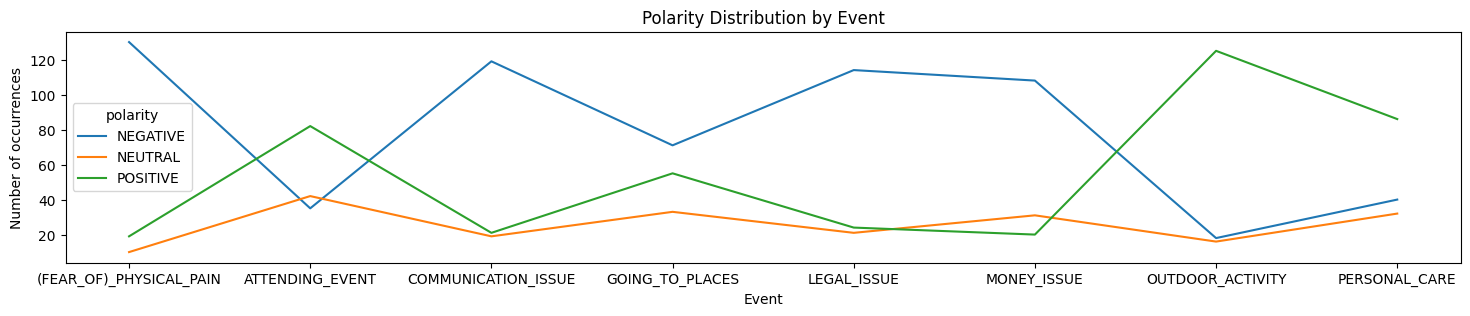

In [81]:
import matplotlib.pyplot as plt

# Group the data by event and polarity
grouped_data = Data.groupby(['Event', 'polarity']).size().unstack()

# Create a multi-line graph
fig, ax = plt.subplots(figsize=(18, 3))

# Plot the data
grouped_data.plot(kind='line', ax=ax)

# Set the labels and title
ax.set_xlabel('Event')
ax.set_ylabel('Number of occurrences')
ax.set_title('Polarity Distribution by Event')

# Show the plot
plt.show()


In [82]:
Data['Event'].value_counts()

Event
ATTENDING_EVENT            159
COMMUNICATION_ISSUE        159
GOING_TO_PLACES            159
LEGAL_ISSUE                159
MONEY_ISSUE                159
OUTDOOR_ACTIVITY           159
(FEAR_OF)_PHYSICAL_PAIN    159
PERSONAL_CARE              158
Name: count, dtype: int64

Distribution of polarity in the dataset can be seen below:

<ipython-input-83-2928ccc00ebb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Data, x='polarity', palette='viridis')


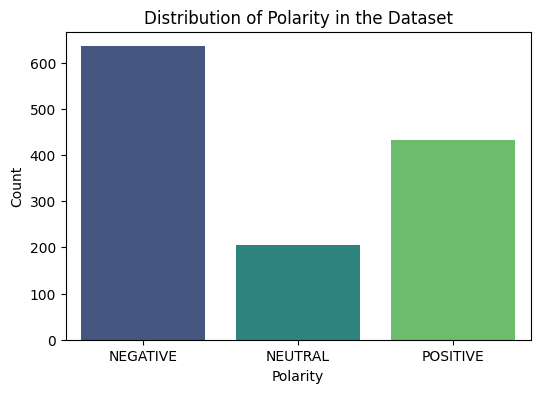

In [83]:

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of polarity in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=Data, x='polarity', palette='viridis')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Polarity in the Dataset')
plt.show()

In [84]:
#Importing libraries
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text data
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
# writing a def for preprocessing the  Text
def preprocess_text(text):
    # Changing the text to lowercase
    text = text.lower()
    # Revoming all the  punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [86]:
# preprocessing for text using def: preprocess_text
Data['text'] = Data['text'].apply(preprocess_text)

In [88]:
Data['text'].head()

0    choosing undergo open heart surgery never felt...
1    either going big barbecue going ok said dick a...
2    health reasons need undergo medical tests trea...
3    going concert one location learn information l...
4    really excited concert care music honest said ...
Name: text, dtype: object

In [89]:
# Encode target labels
le_polarity = LabelEncoder()
Data['polarity'] = le_polarity.fit_transform(Data['polarity'])

In [90]:
Data['polarity'].unique()

array([0, 1, 2])

In [91]:
le_events = LabelEncoder()
Data['Event'] = le_events.fit_transform(Data['Event'])

In [92]:
Data['Event'].unique()

array([1, 2, 3, 4, 5, 6, 7, 0])

In [93]:
# Split the dataset
X_train, X_test, y_train_polarity, y_test_polarity = train_test_split(Data['text'], Data['polarity'], test_size=0.2, random_state=42)
X_train, X_test, y_train_events, y_test_events = train_test_split(Data['text'], Data['Event'], test_size=0.2, random_state=42)


In [94]:
X_train.shape

(1016,)

In [95]:
y_test_events.shape

(255,)

In [96]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [97]:
#using machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [98]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [99]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, f1_score
# Polarity Detection
nb_polarity_model = MultinomialNB()
nb_polarity_model.fit(X_train_tfidf, y_train_polarity)
y_pred_polarity_nb = nb_polarity_model.predict(X_test_tfidf)
accuracy_polarity_nb = accuracy_score(y_test_polarity, y_pred_polarity_nb)
f1_polarity_nb = f1_score(y_test_polarity, y_pred_polarity_nb, average='weighted')

# Event Classification
nb_event_model = MultinomialNB()
nb_event_model.fit(X_train_tfidf, y_train_events)
y_pred_event_nb = nb_event_model.predict(X_test_tfidf)
accuracy_event_nb = accuracy_score(y_test_events, y_pred_event_nb)
f1_event_nb = f1_score(y_test_events, y_pred_event_nb, average='weighted')

print("Naive Bayes - Polarity Detection")
print(f"Accuracy: {accuracy_polarity_nb}")
print(f"F1 Score: {f1_polarity_nb}")

print("Naive Bayes - Event Classification")
print(f"Accuracy: {accuracy_event_nb}")
print(f"F1 Score: {f1_event_nb}")
DefaultNaive_polarity=[f"Accuracy :{accuracy_polarity_nb}",f"F1_score:{f1_polarity_nb}"]
DefaultNaive_event=[f"Accuracy :{accuracy_event_nb}",f"F1_score:{f1_event_nb}"]

Naive Bayes - Polarity Detection
Accuracy: 0.6431372549019608
F1 Score: 0.574030642628255
Naive Bayes - Event Classification
Accuracy: 0.8509803921568627
F1 Score: 0.8522428535741526


In [100]:
#Finding the best parameters for Naive Bayes

from sklearn.model_selection import GridSearchCV

# Define the grid of parameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Create a GridSearchCV object
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search_nb.fit(X_train_tfidf, y_train_polarity)

# Get the best parameters
best_params = grid_search_nb.best_params_

# Print the best parameters
print("Best parameters for Naive Bayes:")
print(best_params)


Best parameters for Naive Bayes:
{'alpha': 2.0, 'fit_prior': False}


In [101]:
#Naive Bayes with Best parameters
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, f1_score
# Polarity Detection
nb_polarity_model = MultinomialNB(alpha=2, fit_prior=False)
nb_polarity_model.fit(X_train_tfidf, y_train_polarity)
y_pred_polarity_nb = nb_polarity_model.predict(X_test_tfidf)
accuracy_polarity_nb = accuracy_score(y_test_polarity, y_pred_polarity_nb)
f1_polarity_nb = f1_score(y_test_polarity, y_pred_polarity_nb, average='weighted')

# Event Classification
nb_event_model = MultinomialNB(alpha=2, fit_prior=False)
nb_event_model.fit(X_train_tfidf, y_train_events)
y_pred_event_nb = nb_event_model.predict(X_test_tfidf)
accuracy_event_nb = accuracy_score(y_test_events, y_pred_event_nb)
f1_event_nb = f1_score(y_test_events, y_pred_event_nb, average='weighted')

print("Naive Bayes - Polarity Detection")
print(f"Accuracy: {accuracy_polarity_nb}")
print(f"F1 Score: {f1_polarity_nb}")

print("Naive Bayes - Event Classification")
print(f"Accuracy: {accuracy_event_nb}")
print(f"F1 Score: {f1_event_nb}")

BestNaive_polarity=[f"Accuracy :{accuracy_polarity_nb}",f"F1_score:{f1_polarity_nb}"]
BestNaive_event=[f"Accuracy :{accuracy_event_nb}",f"F1_score:{f1_event_nb}"]

Naive Bayes - Polarity Detection
Accuracy: 0.7176470588235294
F1 Score: 0.6981029059451708
Naive Bayes - Event Classification
Accuracy: 0.8705882352941177
F1 Score: 0.8715876175805908


In [102]:
# Comparing the accuracy scores with Default parametes and best parameters.
df = pd.DataFrame({
    'Default': DefaultNaive_polarity + DefaultNaive_event,
    'Best': BestNaive_polarity + BestNaive_event
}, index=['Polarity Detection', 'Event Classification', 'Polarity Detection', 'Event Classification'])

# Display the DataFrame
print(df.to_string())


                                           Default                          Best
Polarity Detection    Accuracy :0.6431372549019608  Accuracy :0.7176470588235294
Event Classification    F1_score:0.574030642628255   F1_score:0.6981029059451708
Polarity Detection    Accuracy :0.8509803921568627  Accuracy :0.8705882352941177
Event Classification   F1_score:0.8522428535741526   F1_score:0.8715876175805908


In [103]:
# logistic regression with defalut values

from sklearn.linear_model import LogisticRegression

# Polarity Detection
lr_polarity_model = LogisticRegression(max_iter=200)
lr_polarity_model.fit(X_train_tfidf, y_train_polarity)
y_pred_polarity_lr = lr_polarity_model.predict(X_test_tfidf)
accuracy_polarity_lr = accuracy_score(y_test_polarity, y_pred_polarity_lr)
f1_polarity_lr = f1_score(y_test_polarity, y_pred_polarity_lr, average='weighted')

# Event Classification
lr_event_model = LogisticRegression(max_iter=200)
lr_event_model.fit(X_train_tfidf, y_train_events)
y_pred_event_lr = lr_event_model.predict(X_test_tfidf)
accuracy_event_lr = accuracy_score(y_test_events, y_pred_event_lr)
f1_event_lr = f1_score(y_test_events, y_pred_event_lr, average='weighted')

print("Logistic Regression - Polarity Detection")
print(f"Accuracy: {accuracy_polarity_lr}")
print(f"F1 Score: {f1_polarity_lr}")

print("Logistic Regression - Event Classification")
print(f"Accuracy: {accuracy_event_lr}")
print(f"F1 Score: {f1_event_lr}")

DefaultLogistic_event=[f"Accuracy :{accuracy_event_lr}",f"F1_score:{f1_event_lr}"]
DefaultLogistic_polarity=[f"Accuracy :{accuracy_polarity_lr}",f"F1_score:{f1_polarity_lr}"]

Logistic Regression - Polarity Detection
Accuracy: 0.7019607843137254
F1 Score: 0.6765078372648231
Logistic Regression - Event Classification
Accuracy: 0.8549019607843137
F1 Score: 0.8561695132780799


In [104]:
# Define the grid of parameters to search
#output:{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg']
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)

# Fit the grid search object to the data
grid_search_lr.fit(X_train_tfidf, y_train_polarity)

# Get the best parameters
best_params = grid_search_lr.best_params_

# Print the best parameters
print("Best parameters for Logistic Regression:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best parameters for Logistic Regression:
{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [105]:
#Logistic regression with best parameters
# Polarity Detection
lr_polarity_model = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_polarity_model.fit(X_train_tfidf, y_train_polarity)
y_pred_polarity_lr = lr_polarity_model.predict(X_test_tfidf)
accuracy_polarity_lr = accuracy_score(y_test_polarity, y_pred_polarity_lr)
f1_polarity_lr = f1_score(y_test_polarity, y_pred_polarity_lr, average='weighted')

# Event Classification
lr_event_model = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_event_model.fit(X_train_tfidf, y_train_events)
y_pred_event_lr = lr_event_model.predict(X_test_tfidf)
accuracy_event_lr = accuracy_score(y_test_events, y_pred_event_lr)
f1_event_lr = f1_score(y_test_events, y_pred_event_lr, average='weighted')

print("Logistic Regression - Polarity Detection")
print(f"Accuracy: {accuracy_polarity_lr}")
print(f"F1 Score: {f1_polarity_lr}")

print("Logistic Regression - Event Classification")
print(f"Accuracy: {accuracy_event_lr}")
print(f"F1 Score: {f1_event_lr}")

BestLogistic_event=[f"Accuracy :{accuracy_event_lr}",f"F1_score:{f1_event_lr}"]
BestLogistic_polarity=[f"Accuracy :{accuracy_polarity_lr}",f"F1_score:{f1_polarity_lr}"]


Logistic Regression - Polarity Detection
Accuracy: 0.7215686274509804
F1 Score: 0.7151332681410159
Logistic Regression - Event Classification
Accuracy: 0.8705882352941177
F1 Score: 0.8695252367575699


In [106]:
#Comparing the Default score with Bestparameters score in logistic regression.
df = pd.DataFrame({
    'Default': DefaultLogistic_polarity + DefaultLogistic_event,
    'Best': BestLogistic_polarity + BestLogistic_event
}, index=['Polarity Detection', 'Event Classification', 'Polarity Detection', 'Event Classification'])

# Display the DataFrame
print(df.to_string())


                                           Default                          Best
Polarity Detection    Accuracy :0.7019607843137254  Accuracy :0.7215686274509804
Event Classification   F1_score:0.6765078372648231   F1_score:0.7151332681410159
Polarity Detection    Accuracy :0.8549019607843137  Accuracy :0.8705882352941177
Event Classification   F1_score:0.8561695132780799   F1_score:0.8695252367575699


In [107]:
#K-Nearest Neighbors (KNN) with default parameters
from sklearn.neighbors import KNeighborsClassifier

# Polarity Detection
knn_polarity_model = KNeighborsClassifier()
knn_polarity_model.fit(X_train_tfidf, y_train_polarity)
y_pred_polarity_knn = knn_polarity_model.predict(X_test_tfidf)
accuracy_polarity_knn = accuracy_score(y_test_polarity, y_pred_polarity_knn)
f1_polarity_knn = f1_score(y_test_polarity, y_pred_polarity_knn, average='weighted')

# Event Classification
knn_event_model = KNeighborsClassifier()
knn_event_model.fit(X_train_tfidf, y_train_events)
y_pred_event_knn = knn_event_model.predict(X_test_tfidf)
accuracy_event_knn = accuracy_score(y_test_events, y_pred_event_knn)
f1_event_knn = f1_score(y_test_events, y_pred_event_knn, average='weighted')

print("KNN - Polarity Detection")
print(f"Accuracy: {accuracy_polarity_knn}")
print(f"F1 Score: {f1_polarity_knn}")

print("KNN - Event Classification")
print(f"Accuracy: {accuracy_event_knn}")
print(f"F1 Score: {f1_event_knn}")

DefaultKnn_polarity=[f"Accuracy :{accuracy_polarity_knn}",f"F1_score:{f1_polarity_knn}"]
Defaultknn_event=[f"Accuracy :{accuracy_event_knn}",f"F1_score:{f1_event_knn}"]

KNN - Polarity Detection
Accuracy: 0.596078431372549
F1 Score: 0.567817879098156
KNN - Event Classification
Accuracy: 0.6941176470588235
F1 Score: 0.6950634014586053


In [108]:
# Define the grid of parameters to search
#output:{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search_knn.fit(X_train_tfidf, y_train_polarity)

# Get the best parameters
best_params = grid_search_knn.best_params_

# Print the best parameters
print("Best parameters for KNN:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("canno

Best parameters for KNN:
{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


In [109]:
#KNN with best parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
# Polarity Detection
knn_polarity_model = KNeighborsClassifier(algorithm='auto', n_neighbors=11, weights='distance')
knn_polarity_model.fit(X_train_tfidf, y_train_polarity)
y_pred_polarity_knn = knn_polarity_model.predict(X_test_tfidf)
accuracy_polarity_knn = accuracy_score(y_test_polarity, y_pred_polarity_knn)
f1_polarity_knn = f1_score(y_test_polarity, y_pred_polarity_knn, average='weighted')

# Event Classification
knn_event_model = KNeighborsClassifier(algorithm='auto', n_neighbors=11, weights='distance')
knn_event_model.fit(X_train_tfidf, y_train_events)
y_pred_event_knn = knn_event_model.predict(X_test_tfidf)
accuracy_event_knn = accuracy_score(y_test_events, y_pred_event_knn)
f1_event_knn = f1_score(y_test_events, y_pred_event_knn, average='weighted')

print("KNN - Polarity Detection")
print(f"Accuracy: {accuracy_polarity_knn}")
print(f"F1 Score: {f1_polarity_knn}")

print("KNN - Event Classification")
print(f"Accuracy: {accuracy_event_knn}")
print(f"F1 Score: {f1_event_knn}")

BestKnn_polarity=[f"Accuracy :{accuracy_polarity_knn}",f"F1_score:{f1_polarity_knn}"]
Bestknn_event=[f"Accuracy :{accuracy_event_knn}",f"F1_score:{f1_event_knn}"]

KNN - Polarity Detection
Accuracy: 0.6313725490196078
F1 Score: 0.6023570086540314
KNN - Event Classification
Accuracy: 0.7764705882352941
F1 Score: 0.7759051980313381


In [110]:
df = pd.DataFrame({
    'Default': DefaultKnn_polarity + Defaultknn_event,
    'Best': BestKnn_polarity + Bestknn_event
}, index=['Polarity Detection', 'Event Classification', 'Polarity Detection', 'Event Classification'])

# Display the DataFrame
print(df.to_string())


                                           Default                          Best
Polarity Detection     Accuracy :0.596078431372549  Accuracy :0.6313725490196078
Event Classification    F1_score:0.567817879098156   F1_score:0.6023570086540314
Polarity Detection    Accuracy :0.6941176470588235  Accuracy :0.7764705882352941
Event Classification   F1_score:0.6950634014586053   F1_score:0.7759051980313381


In [113]:
# Preprocess the input text
text = input("Enter the text: ")
text = preprocess_text(text)

# Assuming 'vectorizer' was fitted on the training data, use it directly
text_tfidf = vectorizer.transform([text])

# Predict the polarity and event
polarity_prediction = nb_polarity_model.predict(text_tfidf)[0]
event_prediction = nb_polarity_model.predict(text_tfidf)[0]

# Get the corresponding labels
polarity_label = le_polarity.inverse_transform([polarity_prediction])[0]
event_label = le_events.inverse_transform([event_prediction])[0]

# Print the results
print(f"Polarity: {polarity_label}")
print(f"Event: {event_label}")


Enter the text: Each time I visit my aunt, security agents stop me and question me at length.
Polarity: NEGATIVE
Event: (FEAR_OF)_PHYSICAL_PAIN
